In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns

In [2]:
df = pd.read_csv("horn_panel.csv")
df.head()

Unnamed: 0  year dis2_code        date dis2_name dis1_code  dis1_name  \
0           0  2000    DJ0202  2000-08-01     Randa      DJ02  Tadjourah   
1           1  2000    DJ0401  2000-06-01  Djibouti      DJ04   Djibouti   
2           2  2000    DJ0203  2000-05-01     Balha      DJ02  Tadjourah   
3           3  2000    DJ0202  2000-09-01     Randa      DJ02  Tadjourah   
4           4  2000    DJ0301  2000-07-01   YobokiI      DJ03    Dilkhil   

  dis0_code dis0_name   drought  ...  rainfall            pop  gdp_pc    hdi  \
0       DJI  Djibouti -0.122997  ...  4.435764   14964.359375     NaN  0.361   
1       DJI  Djibouti -0.122997  ...  9.574218  450333.062500     NaN  0.361   
2       DJI  Djibouti -0.122997  ...  3.468084    7422.979492     NaN  0.361   
3       DJI  Djibouti -0.122997  ...  4.435764   14964.359375     NaN  0.361   
4       DJI  Djibouti -0.122997  ...  3.641596   38817.105469     NaN  0.361   

   month  flood_missing  flood_sum_imp  temp_missing  demonstrations  \
0      8              1            0.0             0               0   
1      6              1            0.0             0               0   
2      5              1            0.0             0               0   
3      9              1            0.0             0               0   
4      7              1            0.0             0               0   

   violent_incidents  
0                  0  
1                  0  
2                  0  
3                  0  
4                  0  

[5 rows x 32 columns]

In [30]:
df.describe()

year        drought      flooding    flood_area  \
count  210380.000000  210380.000000  75360.000000  39350.000000   
mean     2010.753731      -0.362222    131.015738     15.681935   
std         6.452987       0.126942    613.847480     51.975023   
min      2000.000000      -0.475231      0.000000      0.062500   
25%      2005.000000      -0.468577      0.000000      0.375000   
50%      2011.000000      -0.468577      1.000000      2.125000   
75%      2016.000000      -0.221317     38.000000      9.250000   
max      2022.000000      -0.122997  26521.000000   1657.562500   

         temperature     fatalities          riots       protests  \
count  210380.000000  210380.000000  210380.000000  210380.000000   
mean       25.609829       1.078430       0.025349       0.054829   
std         5.234183      17.272921       0.219302       0.504523   
min         5.861611       0.000000       0.000000       0.000000   
25%        22.007759       0.000000       0.000000       0.000000   
50%        25.096966       0.000000       0.000000       0.000000   
75%        29.439868       0.000000       0.000000       0.000000   
max        42.097939    3015.000000      13.000000      46.000000   

       viol_against_civ     explosions  ...        battles           hief  \
count     210380.000000  210380.000000  ...  210380.000000  198118.000000   
mean           0.098983       0.046050  ...       0.141677       0.757291   
std            0.645088       0.578286  ...       1.096613       0.193710   
min            0.000000       0.000000  ...       0.000000       0.169000   
25%            0.000000       0.000000  ...       0.000000       0.746000   
50%            0.000000       0.000000  ...       0.000000       0.854000   
75%            0.000000       0.000000  ...       0.000000       0.857000   
max           29.000000      46.000000  ...      56.000000       0.884000   

            rainfall           pop         gdp_pc            hdi  \
count  210380.000000  1.970350e+05  166191.000000  180304.000000   
mean       28.124172  2.858614e+05    2967.104553       0.492800   
std        29.095524  4.452217e+05    1256.491839       0.062176   
min       -49.484885  2.462066e+03     718.333024       0.287000   
25%         2.373582  1.024591e+05    1830.954668       0.457000   
50%        16.996210  1.559181e+05    3228.523411       0.502000   
75%        52.179438  2.612193e+05    4074.620682       0.539000   
max       108.083656  5.107008e+06    5393.976153       0.581000   

               month  flood_missing  flood_sum_imp   temp_missing  
count  210380.000000  210380.000000  161879.000000  210380.000000  
mean        6.455224       0.641791      13.799906       0.003018  
std         3.448165       0.479475     230.783818       0.054857  
min         1.000000       0.000000       0.000000       0.000000  
25%         3.000000       0.000000       0.000000       0.000000  
50%         6.000000       1.000000       0.000000       0.000000  
75%         9.000000       1.000000       0.000000       0.000000  
max        12.000000       1.000000   26521.000000       1.000000  

[8 rows x 22 columns]

In [63]:
df['fatal_incident'] = df.apply(lambda row: 1 if row['fatalities'] >= 1 else 0, axis=1)

In [64]:
df['date'] = pd.to_datetime(df['date'])
df.head()

dis2_code       date     dis2_name dis1_code dis1_name dis0_code dis0_name  \
0    DJ0101 2000-02-01  Alaili Dadda      DJ01     Obock        DJ  Djibouti   
1    DJ0101 2000-03-01  Alaili Dadda      DJ01     Obock        DJ  Djibouti   
2    DJ0101 2000-04-01  Alaili Dadda      DJ01     Obock        DJ  Djibouti   
3    DJ0101 2000-05-01  Alaili Dadda      DJ01     Obock        DJ  Djibouti   
4    DJ0101 2000-06-01  Alaili Dadda      DJ01     Obock        DJ  Djibouti   

   mean_ndvi  flood_sum  flood_area  ...  riots  protests  viol_against_civ  \
0   0.088291        NaN         NaN  ...    NaN       NaN               NaN   
1   0.085908        NaN         NaN  ...    NaN       NaN               NaN   
2   0.087848        NaN         NaN  ...    NaN       NaN               NaN   
3   0.082951        NaN         NaN  ...    NaN       NaN               NaN   
4   0.079332        NaN         NaN  ...    NaN       NaN               NaN   

   explosions  str_dev  total_incidents  battles   heif  prec_mean  \
0         NaN      NaN              NaN      NaN  0.651   6.383704   
1         NaN      NaN              NaN      NaN  0.651  13.160749   
2         NaN      NaN              NaN      NaN  0.651   9.425379   
3         NaN      NaN              NaN      NaN  0.651   5.081708   
4         NaN      NaN              NaN      NaN  0.651   1.959999   

   fatal_incident  
0               0  
1               0  
2               0  
3               0  
4               0  

[5 rows x 22 columns]

In [65]:
df['year'] = pd.DatetimeIndex(df['date']).year
df.head()

dis2_code       date     dis2_name dis1_code dis1_name dis0_code dis0_name  \
0    DJ0101 2000-02-01  Alaili Dadda      DJ01     Obock        DJ  Djibouti   
1    DJ0101 2000-03-01  Alaili Dadda      DJ01     Obock        DJ  Djibouti   
2    DJ0101 2000-04-01  Alaili Dadda      DJ01     Obock        DJ  Djibouti   
3    DJ0101 2000-05-01  Alaili Dadda      DJ01     Obock        DJ  Djibouti   
4    DJ0101 2000-06-01  Alaili Dadda      DJ01     Obock        DJ  Djibouti   

   mean_ndvi  flood_sum  flood_area  ...  protests  viol_against_civ  \
0   0.088291        NaN         NaN  ...       NaN               NaN   
1   0.085908        NaN         NaN  ...       NaN               NaN   
2   0.087848        NaN         NaN  ...       NaN               NaN   
3   0.082951        NaN         NaN  ...       NaN               NaN   
4   0.079332        NaN         NaN  ...       NaN               NaN   

   explosions  str_dev  total_incidents  battles   heif  prec_mean  \
0         NaN      NaN              NaN      NaN  0.651   6.383704   
1         NaN      NaN              NaN      NaN  0.651  13.160749   
2         NaN      NaN              NaN      NaN  0.651   9.425379   
3         NaN      NaN              NaN      NaN  0.651   5.081708   
4         NaN      NaN              NaN      NaN  0.651   1.959999   

   fatal_incident  year  
0               0  2000  
1               0  2000  
2               0  2000  
3               0  2000  
4               0  2000  

[5 rows x 23 columns]

In [66]:
df = df.rename(columns={'heif':'hief'})
df.head()

dis2_code       date     dis2_name dis1_code dis1_name dis0_code dis0_name  \
0    DJ0101 2000-02-01  Alaili Dadda      DJ01     Obock        DJ  Djibouti   
1    DJ0101 2000-03-01  Alaili Dadda      DJ01     Obock        DJ  Djibouti   
2    DJ0101 2000-04-01  Alaili Dadda      DJ01     Obock        DJ  Djibouti   
3    DJ0101 2000-05-01  Alaili Dadda      DJ01     Obock        DJ  Djibouti   
4    DJ0101 2000-06-01  Alaili Dadda      DJ01     Obock        DJ  Djibouti   

   mean_ndvi  flood_sum  flood_area  ...  protests  viol_against_civ  \
0   0.088291        NaN         NaN  ...       NaN               NaN   
1   0.085908        NaN         NaN  ...       NaN               NaN   
2   0.087848        NaN         NaN  ...       NaN               NaN   
3   0.082951        NaN         NaN  ...       NaN               NaN   
4   0.079332        NaN         NaN  ...       NaN               NaN   

   explosions  str_dev  total_incidents  battles   hief  prec_mean  \
0         NaN      NaN              NaN      NaN  0.651   6.383704   
1         NaN      NaN              NaN      NaN  0.651  13.160749   
2         NaN      NaN              NaN      NaN  0.651   9.425379   
3         NaN      NaN              NaN      NaN  0.651   5.081708   
4         NaN      NaN              NaN      NaN  0.651   1.959999   

   fatal_incident  year  
0               0  2000  
1               0  2000  
2               0  2000  
3               0  2000  
4               0  2000  

[5 rows x 23 columns]

In [67]:
df_cols = ['date', 'year', 'dis2_code', 'dis0_code', 'mean_ndvi', 'flood_sum', 'flood_area', 'lst_celsius', 'hief', 'prec_mean', 'fatal_incident', 'total_incidents']
df_clean = df[df_cols]
df_clean.head()

date  year dis2_code dis0_code  mean_ndvi  flood_sum  flood_area  \
0 2000-02-01  2000    DJ0101        DJ   0.088291        NaN         NaN   
1 2000-03-01  2000    DJ0101        DJ   0.085908        NaN         NaN   
2 2000-04-01  2000    DJ0101        DJ   0.087848        NaN         NaN   
3 2000-05-01  2000    DJ0101        DJ   0.082951        NaN         NaN   
4 2000-06-01  2000    DJ0101        DJ   0.079332        NaN         NaN   

   lst_celsius   hief  prec_mean  fatal_incident  total_incidents  
0    31.071572  0.651   6.383704               0              NaN  
1    32.741904  0.651  13.160749               0              NaN  
2    36.026416  0.651   9.425379               0              NaN  
3    37.845225  0.651   5.081708               0              NaN  
4    36.152939  0.651   1.959999               0              NaN

In [68]:
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()
scaled_df = scaler.fit_transform(df_clean[['mean_ndvi', 'flood_sum', 'flood_area', 'lst_celsius', 'hief', 'prec_mean']])
scaled_df = pd.DataFrame(scaled_df, columns = ['mean_ndvi', 'flood_sum', 'flood_area', 'lst_celsius', 'hief', 'prec_mean'])
scaled_df = pd.concat([scaled_df, df_clean[['year', 'dis2_code', 'dis0_code', 'fatal_incident', 'total_incidents']]], axis=1)
scaled_df.head()

mean_ndvi  flood_sum  flood_area  lst_celsius      hief  prec_mean  year  \
0  -1.690120        NaN         NaN     1.036418 -0.548715  -0.893945  2000   
1  -1.701267        NaN         NaN     1.353441 -0.548715  -0.809062  2000   
2  -1.692191        NaN         NaN     1.976829 -0.548715  -0.855848  2000   
3  -1.715104        NaN         NaN     2.322032 -0.548715  -0.910252  2000   
4  -1.732041        NaN         NaN     2.000843 -0.548715  -0.949352  2000   

  dis2_code dis0_code  fatal_incident  total_incidents  
0    DJ0101        DJ               0              NaN  
1    DJ0101        DJ               0              NaN  
2    DJ0101        DJ               0              NaN  
3    DJ0101        DJ               0              NaN  
4    DJ0101        DJ               0              NaN

In [69]:
num_features = ['mean_ndvi', 'flood_sum', 'flood_area', 'lst_celsius', 'hief', 'prec_mean']
cat_features = ['date', 'year', 'dis2_code', 'dis0_code', 'fatal_incident', 'total_incidents']
legend_label = ['Djibouti', 'Eritrea', 'Ethiopia', 'Kenya', 'Sudan', 'Somalia', 'South Sudan', 'Uganda']

Text(0.5, 1.0, 'Total Incidents by Year')

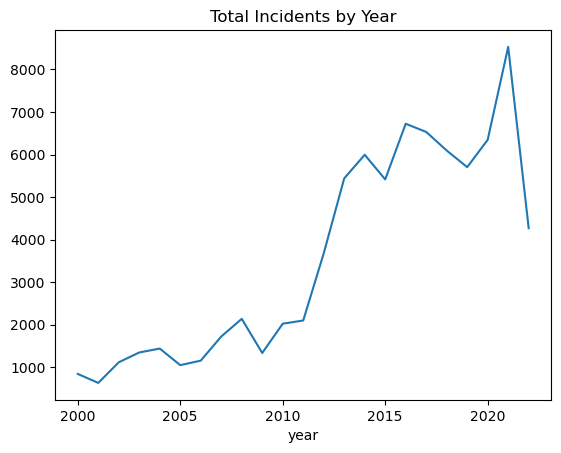

In [70]:
scaled_df.groupby(['year'])['total_incidents'].sum().plot()
plt.title('Total Incidents by Year')

Text(0, 0.5, 'Total Incidents')

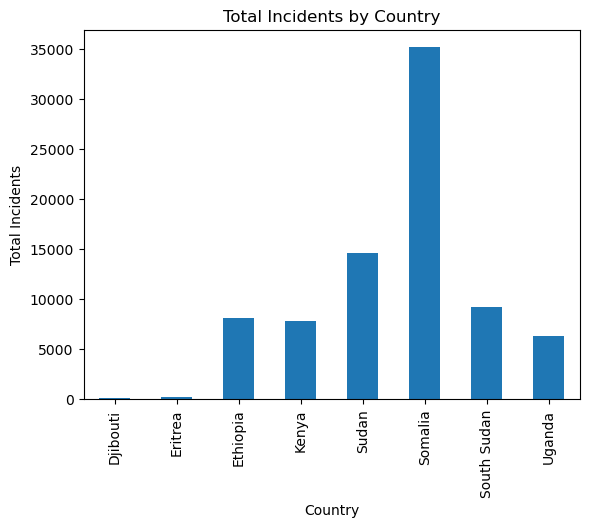

In [71]:
scaled_df.groupby(['dis0_code'])['total_incidents'].sum().plot(kind='bar')
plt.title('Total Incidents by Country')
plt.xticks(np.arange(8), labels=legend_label)
plt.xlabel('Country')
plt.ylabel('Total Incidents')

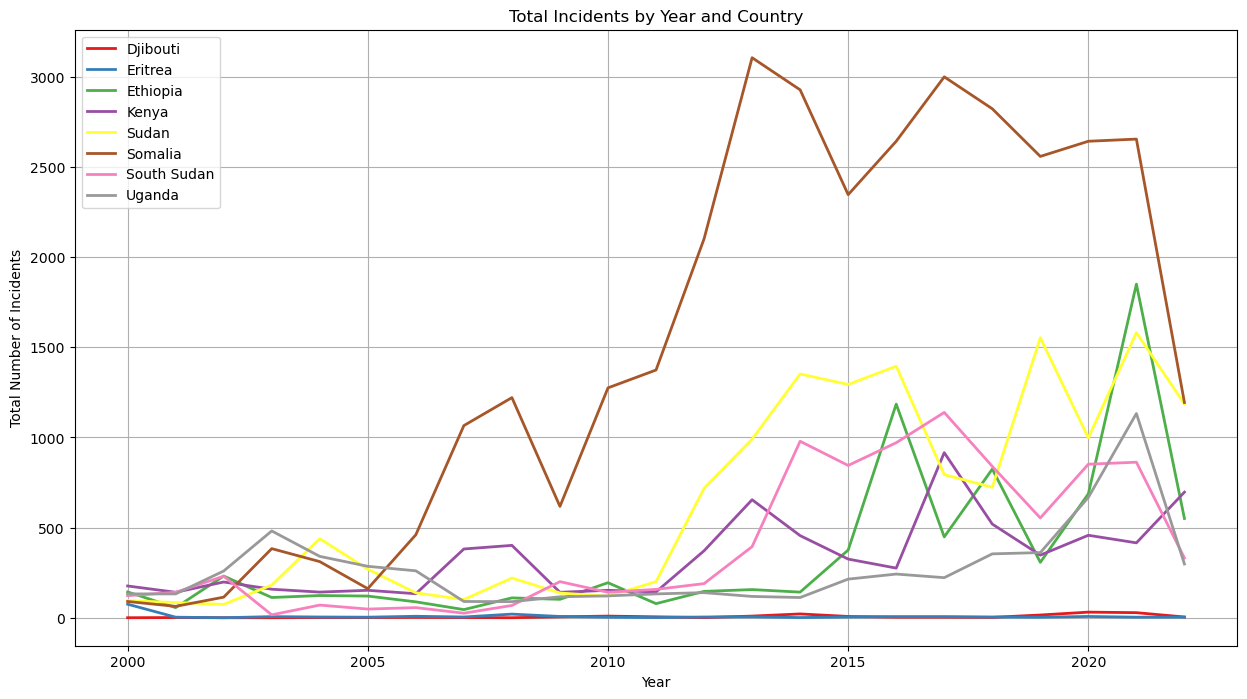

In [72]:
scaled_df.groupby(['year', 'dis0_code'])['total_incidents'].sum().unstack().plot(figsize=(15,8), colormap='Set1', linewidth=2, label=legend_label)
plt.title('Total Incidents by Year and Country')
plt.xlabel('Year')
plt.ylabel('Total Number of Incidents')
plt.grid()
plt.legend(labels = legend_label, loc='best')

array([<AxesSubplot:xlabel='year'>, <AxesSubplot:xlabel='year'>,
       <AxesSubplot:xlabel='year'>, <AxesSubplot:xlabel='year'>,
       <AxesSubplot:xlabel='year'>, <AxesSubplot:xlabel='year'>,
       <AxesSubplot:xlabel='year'>, <AxesSubplot:xlabel='year'>],
      dtype=object)

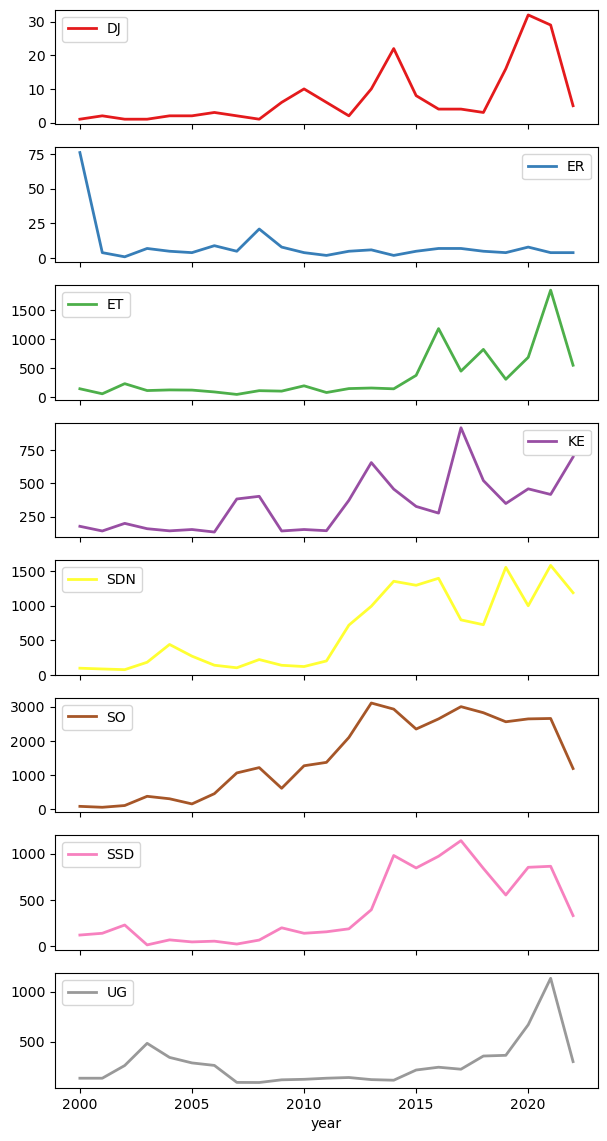

In [73]:
scaled_df.groupby(['year', 'dis0_code'])['total_incidents'].sum().unstack().plot(figsize=(7,14), subplots=True, colormap='Set1', linewidth=2)

In [74]:
scaled_df.groupby(['year', 'dis0_code'])['fatal_incident'].sum()

year  dis0_code
2000  DJ             0
      ER             4
      ET            37
      KE            56
      SDN           28
                  ... 
2022  KE           112
      SDN           83
      SO           119
      SSD           85
      UG            92
Name: fatal_incident, Length: 184, dtype: int64

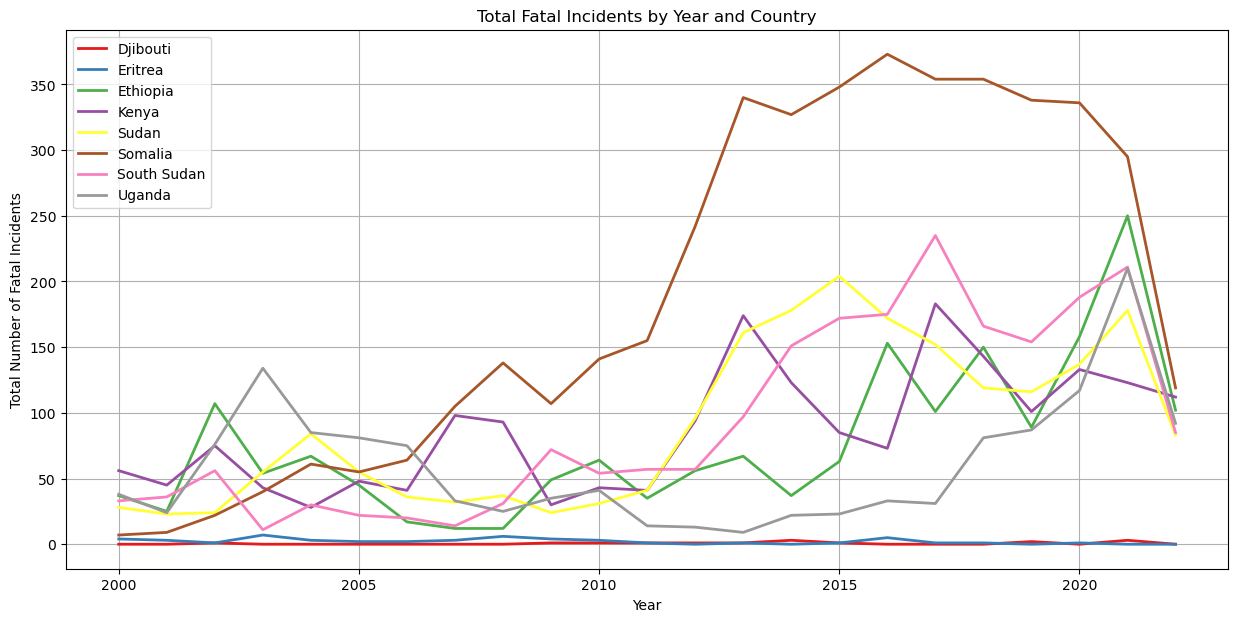

In [75]:
scaled_df.groupby(['year', 'dis0_code'])['fatal_incident'].sum().unstack().plot(figsize=(15,7), colormap='Set1', lw=2)
plt.title('Total Fatal Incidents by Year and Country')
plt.xlabel('Year')
plt.ylabel('Total Number of Fatal Incidents')
plt.grid()
plt.legend(labels = legend_label, loc='best')

In [76]:
#sns.pairplot(scaled_df, hue='dis0_code')

Text(0.5, 1.0, 'Total Incidents Based on Mean Monthly Precipitation')

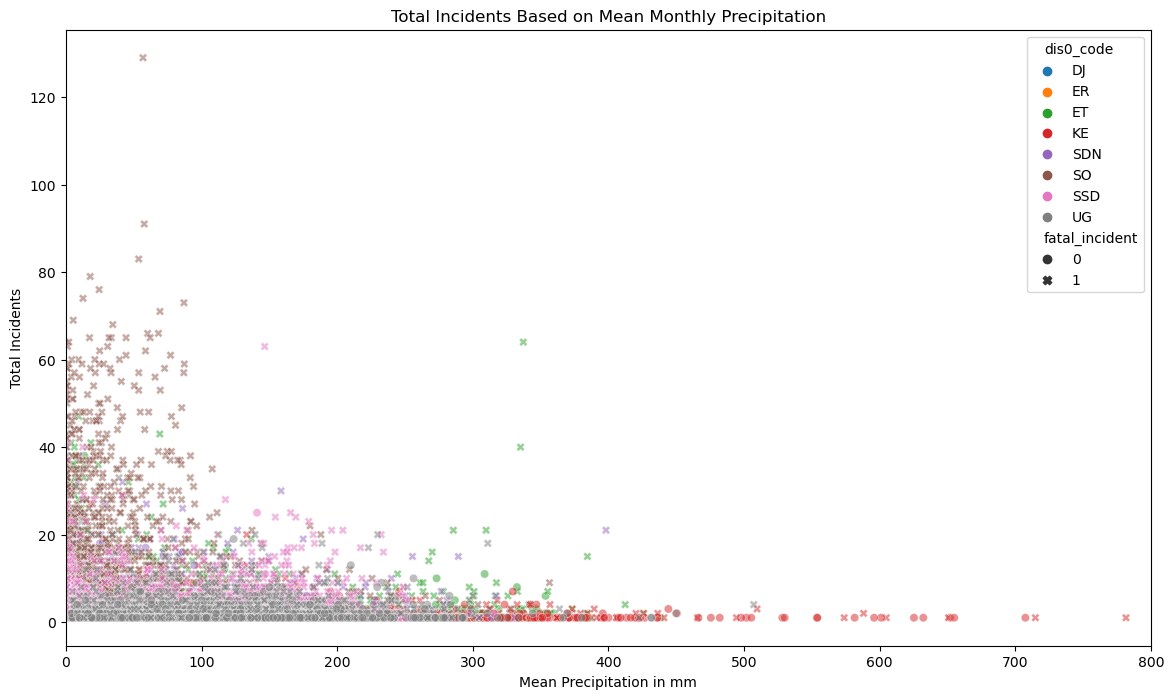

In [77]:
plt.figure(figsize=(14, 8))
sns.scatterplot(x='prec_mean', y='total_incidents', data=df_clean, hue='dis0_code', marker='o', alpha=.5, style='fatal_incident')
plt.xlim([0,800])
plt.xlabel('Mean Precipitation in mm')
plt.ylabel('Total Incidents')
plt.title('Total Incidents Based on Mean Monthly Precipitation')

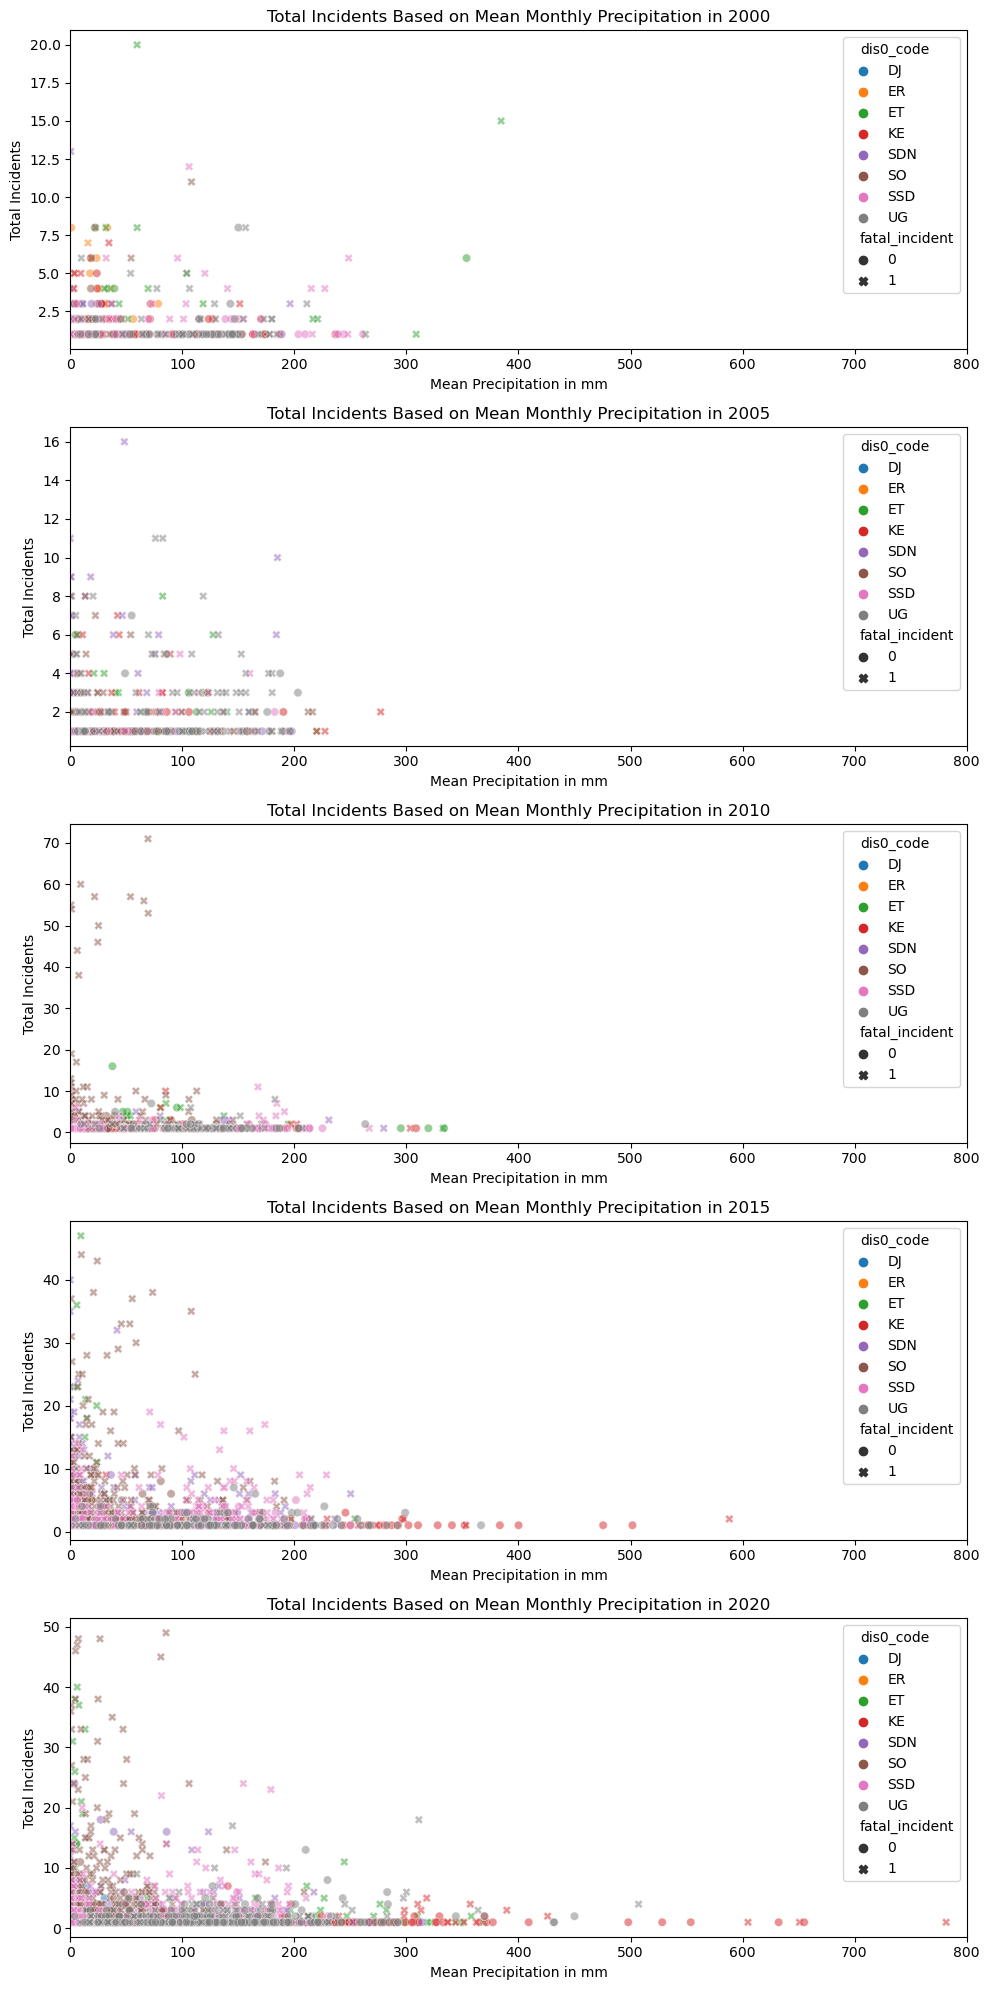

In [78]:
fig, ax = plt.subplots(5, figsize=(10, 20))
sns.scatterplot(x='prec_mean', y='total_incidents', data=df_clean[df_clean['year'] == 2000], hue='dis0_code', marker='o', alpha=.5, style='fatal_incident', ax=ax[0])
ax[0].set_xlim([0,800])
ax[0].set_xlabel('Mean Precipitation in mm')
ax[0].set_ylabel('Total Incidents')
ax[0].set_title('Total Incidents Based on Mean Monthly Precipitation in 2000')

sns.scatterplot(x='prec_mean', y='total_incidents', data=df_clean[df_clean['year'] == 2005], hue='dis0_code', marker='o', alpha=.5, style='fatal_incident', ax=ax[1])
ax[1].set_xlim([0,800])
ax[1].set_xlabel('Mean Precipitation in mm')
ax[1].set_ylabel('Total Incidents')
ax[1].set_title('Total Incidents Based on Mean Monthly Precipitation in 2005')

sns.scatterplot(x='prec_mean', y='total_incidents', data=df_clean[df_clean['year'] == 2010], hue='dis0_code', marker='o', alpha=.5, style='fatal_incident', ax=ax[2])
ax[2].set_xlim([0,800])
ax[2].set_xlabel('Mean Precipitation in mm')
ax[2].set_ylabel('Total Incidents')
ax[2].set_title('Total Incidents Based on Mean Monthly Precipitation in 2010')

sns.scatterplot(x='prec_mean', y='total_incidents', data=df_clean[df_clean['year'] == 2015], hue='dis0_code', marker='o', alpha=.5, style='fatal_incident', ax=ax[3])
ax[3].set_xlim([0,800])
ax[3].set_xlabel('Mean Precipitation in mm')
ax[3].set_ylabel('Total Incidents')
ax[3].set_title('Total Incidents Based on Mean Monthly Precipitation in 2015')

sns.scatterplot(x='prec_mean', y='total_incidents', data=df_clean[df_clean['year'] == 2020], hue='dis0_code', marker='o', alpha=.5, style='fatal_incident', ax=ax[4])
ax[4].set_xlim([0,800])
ax[4].set_xlabel('Mean Precipitation in mm')
ax[4].set_ylabel('Total Incidents')
ax[4].set_title('Total Incidents Based on Mean Monthly Precipitation in 2020')

plt.tight_layout()

Text(0.5, 1.0, 'Total Incidents Based on Mean Monthly NDVI')

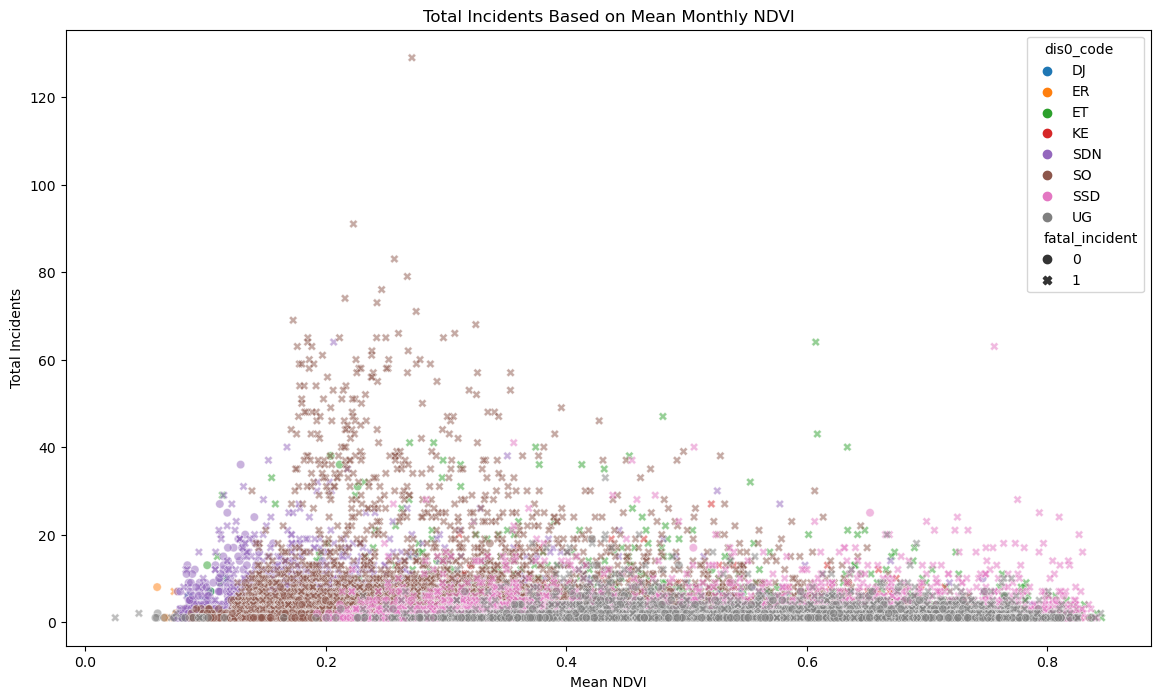

In [79]:
plt.figure(figsize=(14, 8))
sns.scatterplot(x='mean_ndvi', y='total_incidents', data=df_clean, hue='dis0_code', marker='o', alpha=.5, style='fatal_incident')
plt.xlabel('Mean NDVI')
plt.ylabel('Total Incidents')
plt.title('Total Incidents Based on Mean Monthly NDVI')

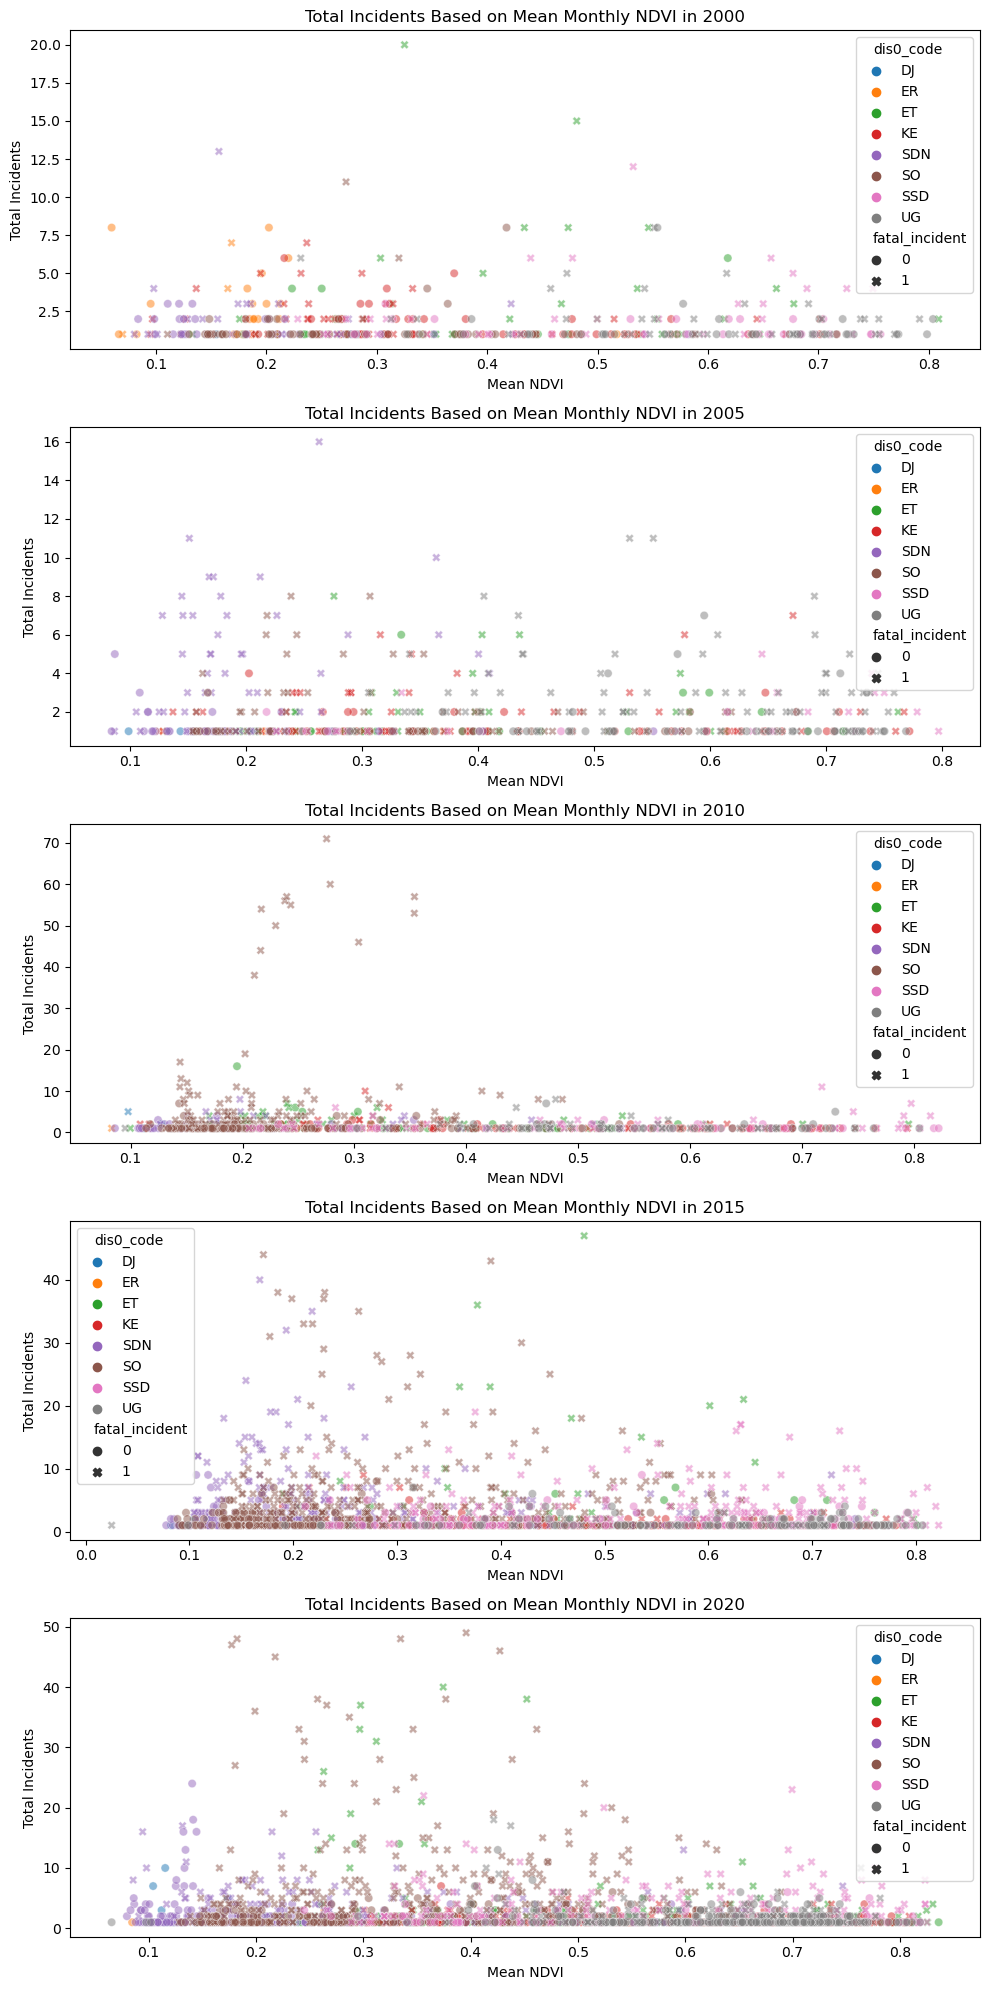

In [80]:
fig, ax = plt.subplots(5, figsize=(10, 20))
sns.scatterplot(x='mean_ndvi', y='total_incidents', data=df_clean[df_clean['year'] == 2000], hue='dis0_code', marker='o', alpha=.5, style='fatal_incident', ax=ax[0])
ax[0].set_xlabel('Mean NDVI')
ax[0].set_ylabel('Total Incidents')
ax[0].set_title('Total Incidents Based on Mean Monthly NDVI in 2000')

sns.scatterplot(x='mean_ndvi', y='total_incidents', data=df_clean[df_clean['year'] == 2005], hue='dis0_code', marker='o', alpha=.5, style='fatal_incident', ax=ax[1])
ax[1].set_xlabel('Mean NDVI')
ax[1].set_ylabel('Total Incidents')
ax[1].set_title('Total Incidents Based on Mean Monthly NDVI in 2005')

sns.scatterplot(x='mean_ndvi', y='total_incidents', data=df_clean[df_clean['year'] == 2010], hue='dis0_code', marker='o', alpha=.5, style='fatal_incident', ax=ax[2])
ax[2].set_xlabel('Mean NDVI')
ax[2].set_ylabel('Total Incidents')
ax[2].set_title('Total Incidents Based on Mean Monthly NDVI in 2010')

sns.scatterplot(x='mean_ndvi', y='total_incidents', data=df_clean[df_clean['year'] == 2015], hue='dis0_code', marker='o', alpha=.5, style='fatal_incident', ax=ax[3])
ax[3].set_xlabel('Mean NDVI')
ax[3].set_ylabel('Total Incidents')
ax[3].set_title('Total Incidents Based on Mean Monthly NDVI in 2015')

sns.scatterplot(x='mean_ndvi', y='total_incidents', data=df_clean[df_clean['year'] == 2020], hue='dis0_code', marker='o', alpha=.5, style='fatal_incident', ax=ax[4])
ax[4].set_xlabel('Mean NDVI')
ax[4].set_ylabel('Total Incidents')
ax[4].set_title('Total Incidents Based on Mean Monthly NDVI in 2020')

plt.tight_layout()

Text(0.5, 1.0, 'Total Incidents Based on Mean Monthly Temperature')

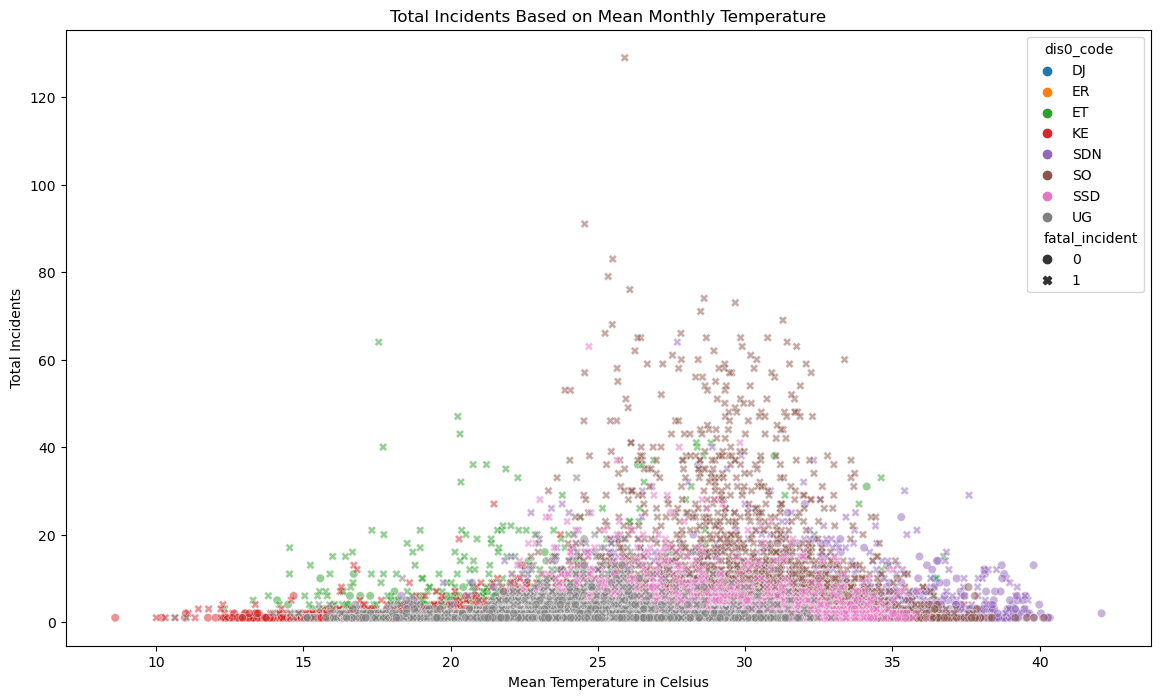

In [81]:
plt.figure(figsize=(14, 8))
sns.scatterplot(x='lst_celsius', y='total_incidents', data=df_clean, hue='dis0_code', marker='o', alpha=.5, style='fatal_incident')
plt.xlabel('Mean Temperature in Celsius')
plt.ylabel('Total Incidents')
plt.title('Total Incidents Based on Mean Monthly Temperature')

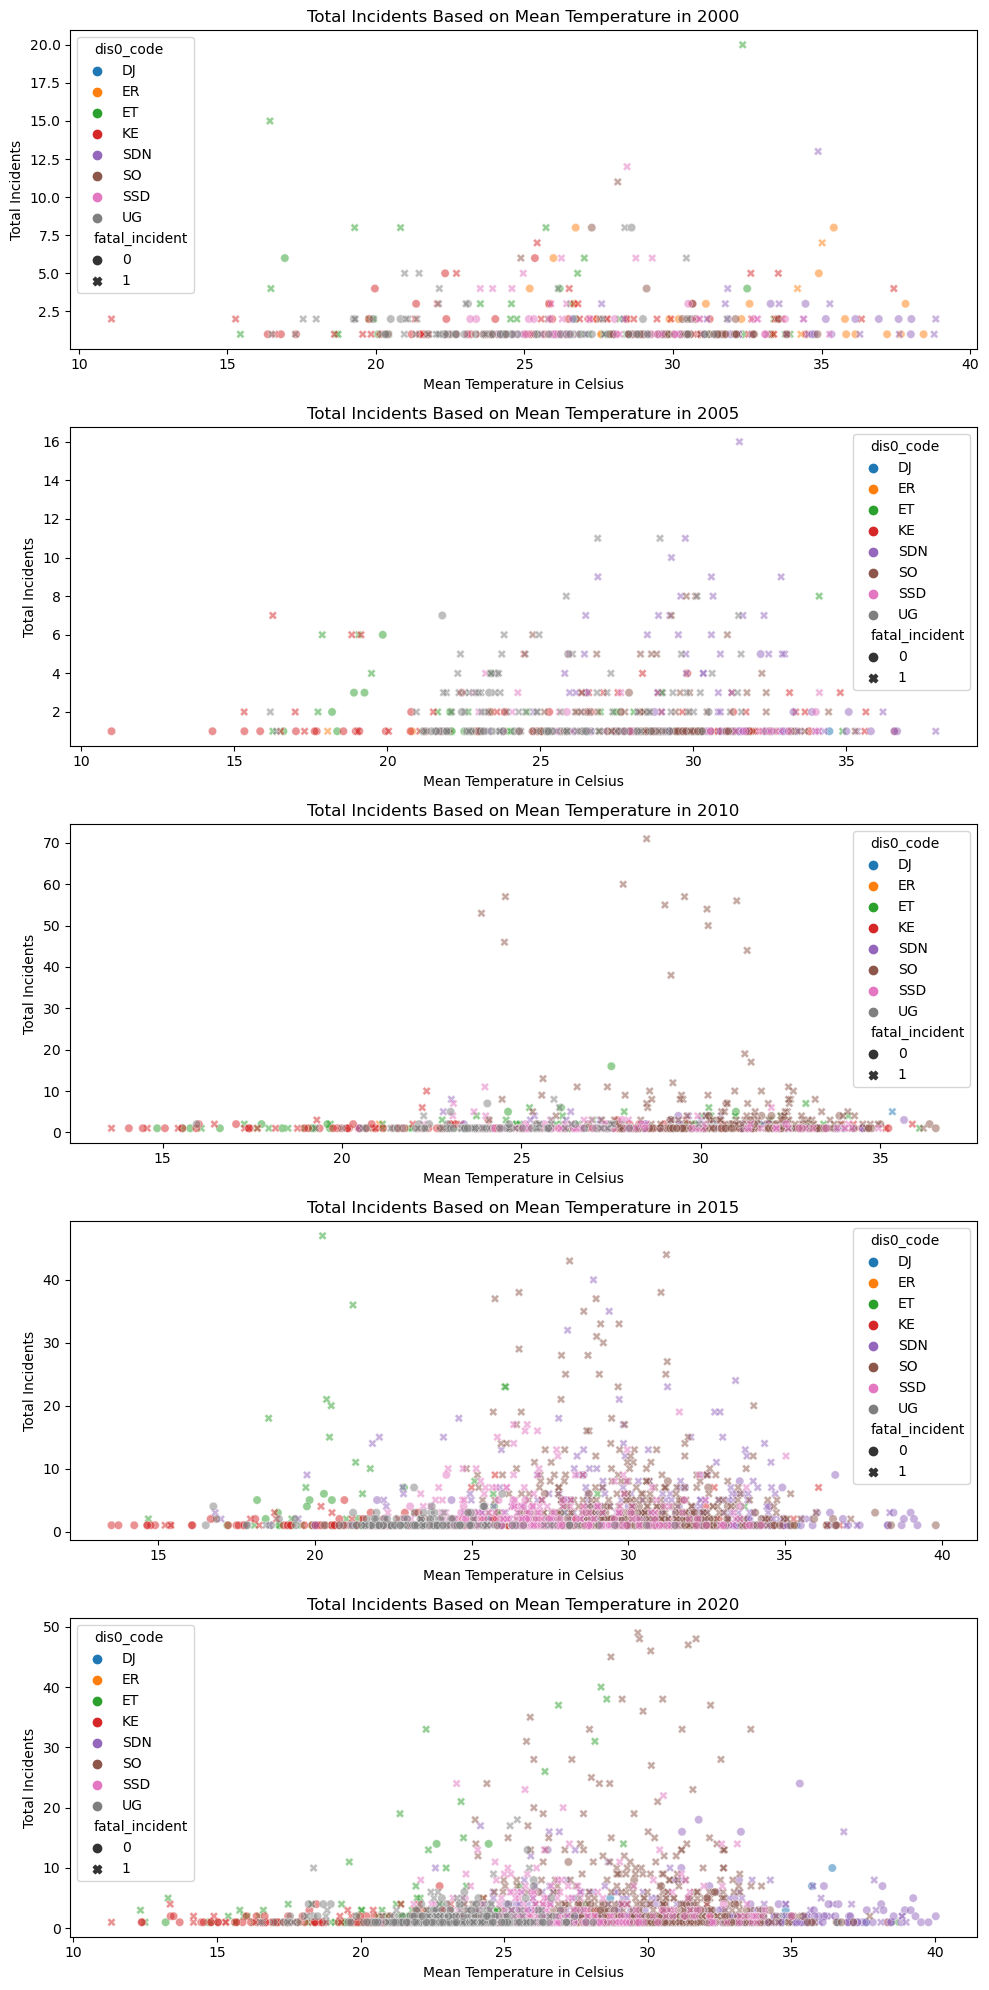

In [82]:
fig, ax = plt.subplots(5, figsize=(10, 20))
sns.scatterplot(x='lst_celsius', y='total_incidents', data=df_clean[df_clean['year'] == 2000], hue='dis0_code', marker='o', alpha=.5, style='fatal_incident', ax=ax[0])
ax[0].set_xlabel('Mean Temperature in Celsius')
ax[0].set_ylabel('Total Incidents')
ax[0].set_title('Total Incidents Based on Mean Temperature in 2000')

sns.scatterplot(x='lst_celsius', y='total_incidents', data=df_clean[df_clean['year'] == 2005], hue='dis0_code', marker='o', alpha=.5, style='fatal_incident', ax=ax[1])
ax[1].set_xlabel('Mean Temperature in Celsius')
ax[1].set_ylabel('Total Incidents')
ax[1].set_title('Total Incidents Based on Mean Temperature in 2005')

sns.scatterplot(x='lst_celsius', y='total_incidents', data=df_clean[df_clean['year'] == 2010], hue='dis0_code', marker='o', alpha=.5, style='fatal_incident', ax=ax[2])
ax[2].set_xlabel('Mean Temperature in Celsius')
ax[2].set_ylabel('Total Incidents')
ax[2].set_title('Total Incidents Based on Mean Temperature in 2010')

sns.scatterplot(x='lst_celsius', y='total_incidents', data=df_clean[df_clean['year'] == 2015], hue='dis0_code', marker='o', alpha=.5, style='fatal_incident', ax=ax[3])
ax[3].set_xlabel('Mean Temperature in Celsius')
ax[3].set_ylabel('Total Incidents')
ax[3].set_title('Total Incidents Based on Mean Temperature in 2015')

sns.scatterplot(x='lst_celsius', y='total_incidents', data=df_clean[df_clean['year'] == 2020], hue='dis0_code', marker='o', alpha=.5, style='fatal_incident', ax=ax[4])
ax[4].set_xlabel('Mean Temperature in Celsius')
ax[4].set_ylabel('Total Incidents')
ax[4].set_title('Total Incidents Based on Mean Temperature in 2020')

plt.tight_layout()

<AxesSubplot:>

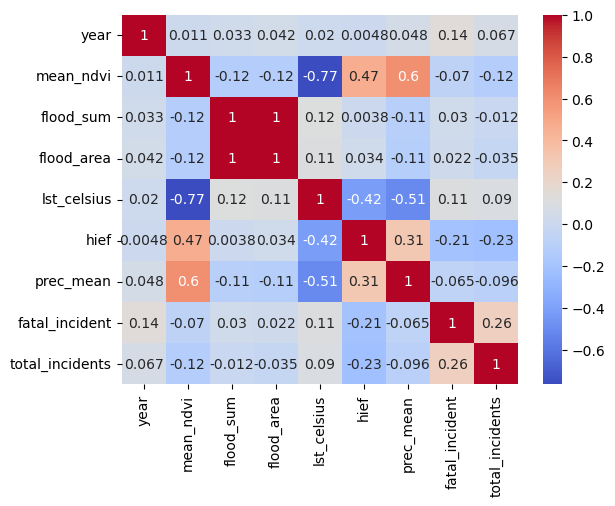

In [83]:
sns.heatmap(df_clean.corr(), cmap="coolwarm", annot=True)

In [84]:
df_clean.head()

date  year dis2_code dis0_code  mean_ndvi  flood_sum  flood_area  \
0 2000-02-01  2000    DJ0101        DJ   0.088291        NaN         NaN   
1 2000-03-01  2000    DJ0101        DJ   0.085908        NaN         NaN   
2 2000-04-01  2000    DJ0101        DJ   0.087848        NaN         NaN   
3 2000-05-01  2000    DJ0101        DJ   0.082951        NaN         NaN   
4 2000-06-01  2000    DJ0101        DJ   0.079332        NaN         NaN   

   lst_celsius   hief  prec_mean  fatal_incident  total_incidents  
0    31.071572  0.651   6.383704               0              NaN  
1    32.741904  0.651  13.160749               0              NaN  
2    36.026416  0.651   9.425379               0              NaN  
3    37.845225  0.651   5.081708               0              NaN  
4    36.152939  0.651   1.959999               0              NaN

In [85]:
df_hief = df_clean.where(df_clean['year'] == 2000).dropna(how='all').drop_duplicates(subset=['dis0_code'])
df_hief = df_hief.drop(columns = ['year', 'dis2_code', 'mean_ndvi', 'flood_sum', 'flood_area', 'lst_celsius', 'prec_mean', 'fatal_incident', 'total_incidents']).dropna()
df_hief.head(8)

date dis0_code   hief
0      2000-02-01        DJ  0.651
2948   2000-02-01        ER  0.675
18492  2000-02-01        ET  0.789
43148  2000-02-01        KE  0.857
120868 2000-02-01       SDN  0.747
142308 2000-02-01        SO  0.169
174200 2000-02-01        UG  0.884

In [86]:
df_clean = df_clean.join(df_hief.set_index('dis0_code'), on='dis0_code', rsuffix='_base')
df_clean.head()

date  year dis2_code dis0_code  mean_ndvi  flood_sum  flood_area  \
0 2000-02-01  2000    DJ0101        DJ   0.088291        NaN         NaN   
1 2000-03-01  2000    DJ0101        DJ   0.085908        NaN         NaN   
2 2000-04-01  2000    DJ0101        DJ   0.087848        NaN         NaN   
3 2000-05-01  2000    DJ0101        DJ   0.082951        NaN         NaN   
4 2000-06-01  2000    DJ0101        DJ   0.079332        NaN         NaN   

   lst_celsius   hief  prec_mean  fatal_incident  total_incidents  date_base  \
0    31.071572  0.651   6.383704               0              NaN 2000-02-01   
1    32.741904  0.651  13.160749               0              NaN 2000-02-01   
2    36.026416  0.651   9.425379               0              NaN 2000-02-01   
3    37.845225  0.651   5.081708               0              NaN 2000-02-01   
4    36.152939  0.651   1.959999               0              NaN 2000-02-01   

   hief_base  
0      0.651  
1      0.651  
2      0.651  
3      0.651  
4      0.651

In [87]:
df_clean['pct_hief'] = np.nan

In [88]:
for i in range(len(df_clean)):
    if np.isnan(df_clean['hief'][i]) == False:
        df_clean['pct_hief'][i] = df_clean['hief'][i] / df_clean['hief_base'][i]

/var/folders/7v/8smtbcsd0tv9tqs4m49cp3140000gn/T/ipykernel_54245/2034513970.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_clean['pct_hief'][i] = df_clean['hief'][i] / df_clean['hief_base'][i]


In [89]:
df_clean.head()

date  year dis2_code dis0_code  mean_ndvi  flood_sum  flood_area  \
0 2000-02-01  2000    DJ0101        DJ   0.088291        NaN         NaN   
1 2000-03-01  2000    DJ0101        DJ   0.085908        NaN         NaN   
2 2000-04-01  2000    DJ0101        DJ   0.087848        NaN         NaN   
3 2000-05-01  2000    DJ0101        DJ   0.082951        NaN         NaN   
4 2000-06-01  2000    DJ0101        DJ   0.079332        NaN         NaN   

   lst_celsius   hief  prec_mean  fatal_incident  total_incidents  date_base  \
0    31.071572  0.651   6.383704               0              NaN 2000-02-01   
1    32.741904  0.651  13.160749               0              NaN 2000-02-01   
2    36.026416  0.651   9.425379               0              NaN 2000-02-01   
3    37.845225  0.651   5.081708               0              NaN 2000-02-01   
4    36.152939  0.651   1.959999               0              NaN 2000-02-01   

   hief_base  pct_hief  
0      0.651       1.0  
1      0.651       1.0  
2      0.651       1.0  
3      0.651       1.0  
4      0.651       1.0

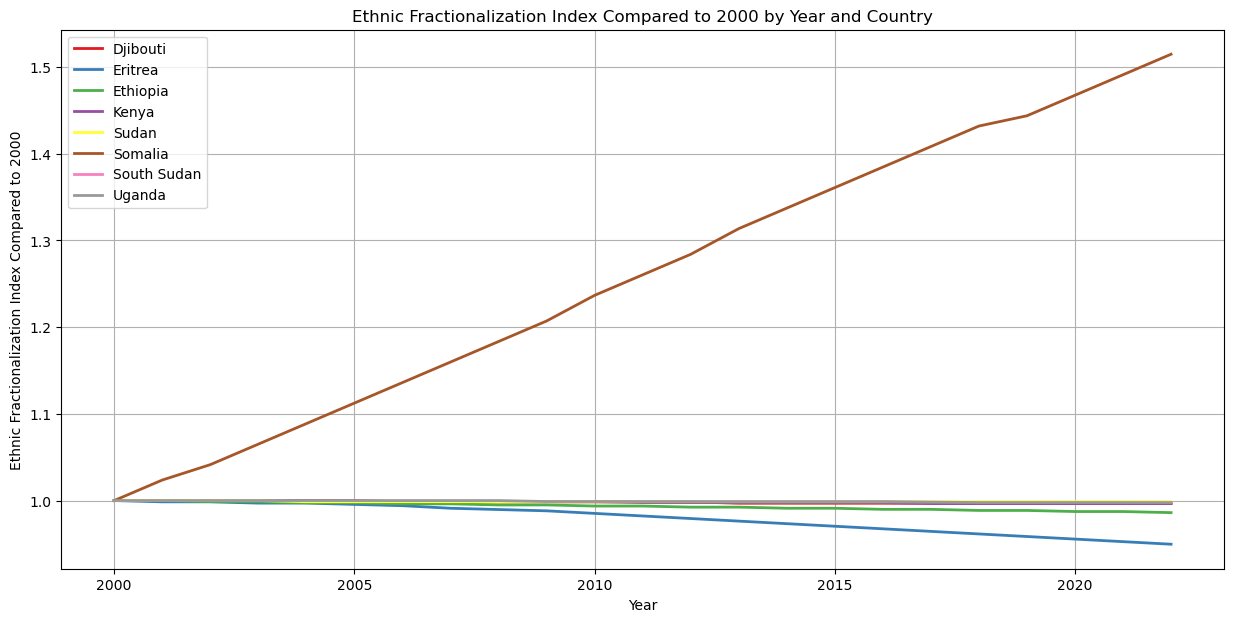

In [90]:
df_clean.groupby(['year', 'dis0_code'])['pct_hief'].mean().unstack().plot(figsize=(15,7), colormap='Set1', lw=2)
plt.title('Ethnic Fractionalization Index Compared to 2000 by Year and Country')
plt.xlabel('Year')
plt.ylabel('Ethnic Fractionalization Index Compared to 2000')
plt.grid()
plt.legend(labels = legend_label, loc='best')

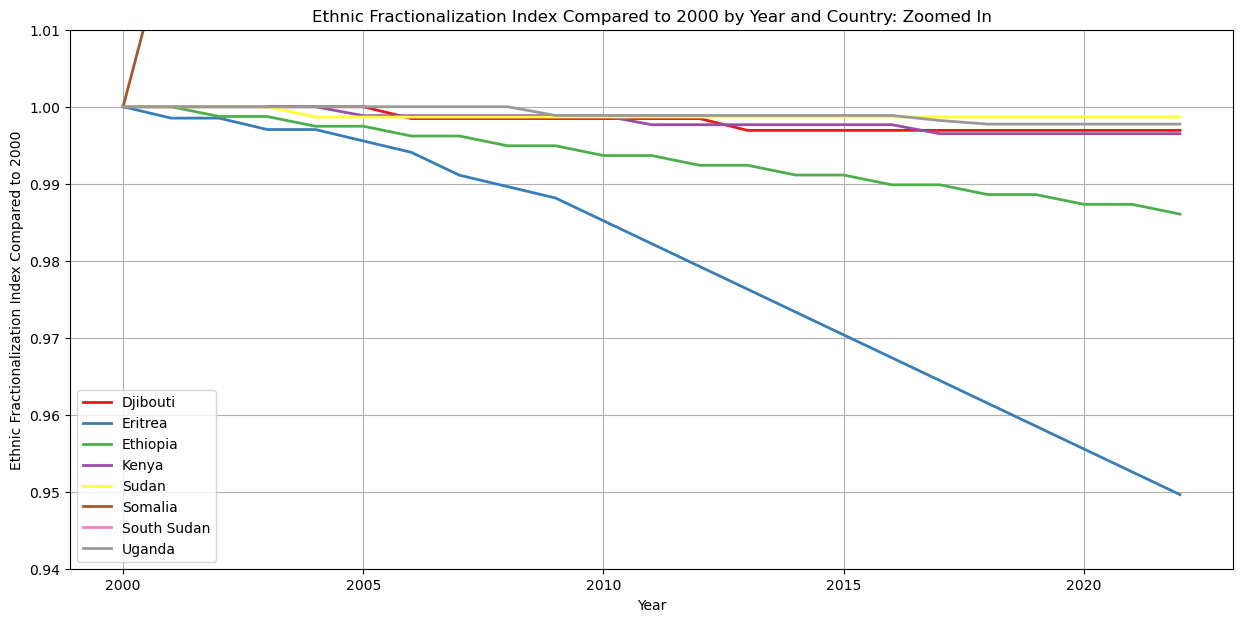

In [91]:
df_clean.groupby(['year', 'dis0_code'])['pct_hief'].mean().unstack().plot(figsize=(15,7), colormap='Set1', lw=2, ylim=(0.94, 1.01))
plt.title('Ethnic Fractionalization Index Compared to 2000 by Year and Country: Zoomed In')
plt.xlabel('Year')
plt.ylabel('Ethnic Fractionalization Index Compared to 2000')
plt.grid()
plt.legend(labels = legend_label, loc='best')

In [92]:
df_clean = df_clean.drop(columns=['date_base', 'hief_base'])

In [94]:
df_clean.head()

date  year dis2_code dis0_code  mean_ndvi  flood_sum  flood_area  \
0 2000-02-01  2000    DJ0101        DJ   0.088291        NaN         NaN   
1 2000-03-01  2000    DJ0101        DJ   0.085908        NaN         NaN   
2 2000-04-01  2000    DJ0101        DJ   0.087848        NaN         NaN   
3 2000-05-01  2000    DJ0101        DJ   0.082951        NaN         NaN   
4 2000-06-01  2000    DJ0101        DJ   0.079332        NaN         NaN   

   lst_celsius   hief  prec_mean  fatal_incident  total_incidents  pct_hief  
0    31.071572  0.651   6.383704               0              NaN       1.0  
1    32.741904  0.651  13.160749               0              NaN       1.0  
2    36.026416  0.651   9.425379               0              NaN       1.0  
3    37.845225  0.651   5.081708               0              NaN       1.0  
4    36.152939  0.651   1.959999               0              NaN       1.0

In [95]:
df_clean = df_clean[['date', 'year', 'dis2_code', 'dis0_code', 'mean_ndvi', 'flood_sum', 'flood_area', 'lst_celsius', 'hief', 'pct_hief', 'prec_mean', 'fatal_incident', 'total_incidents']]
df_clean.head()

date  year dis2_code dis0_code  mean_ndvi  flood_sum  flood_area  \
0 2000-02-01  2000    DJ0101        DJ   0.088291        NaN         NaN   
1 2000-03-01  2000    DJ0101        DJ   0.085908        NaN         NaN   
2 2000-04-01  2000    DJ0101        DJ   0.087848        NaN         NaN   
3 2000-05-01  2000    DJ0101        DJ   0.082951        NaN         NaN   
4 2000-06-01  2000    DJ0101        DJ   0.079332        NaN         NaN   

   lst_celsius   hief  pct_hief  prec_mean  fatal_incident  total_incidents  
0    31.071572  0.651       1.0   6.383704               0              NaN  
1    32.741904  0.651       1.0  13.160749               0              NaN  
2    36.026416  0.651       1.0   9.425379               0              NaN  
3    37.845225  0.651       1.0   5.081708               0              NaN  
4    36.152939  0.651       1.0   1.959999               0              NaN

<AxesSubplot:>

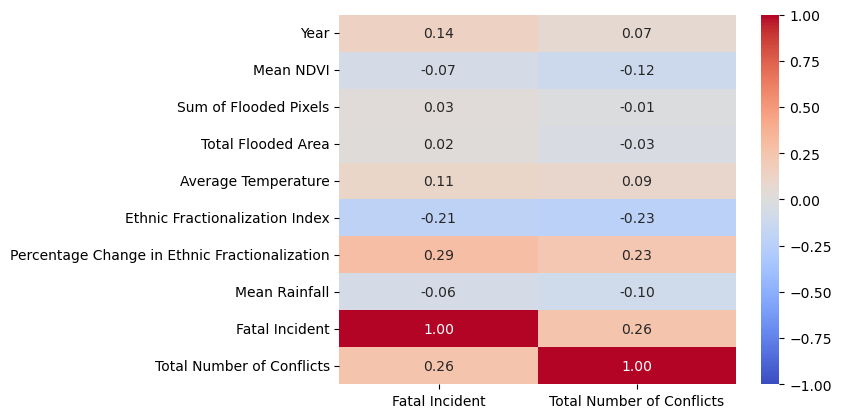

In [104]:
heatmap_cols = ['Year', 'Mean NDVI', 'Sum of Flooded Pixels', 'Total Flooded Area', 'Average Temperature', 'Ethnic Fractionalization Index', 'Percentage Change in Ethnic Fractionalization', 'Mean Rainfall', 'Fatal Incident', 'Total Number of Conflicts']
heatmap_rows = ['Fatal Incident', 'Total Number of Conflicts']
sns.heatmap(df_clean.corr().iloc[:,8:10], vmin=-1, vmax=1, cmap="coolwarm", annot=True, fmt=".2f", yticklabels=heatmap_cols, xticklabels=heatmap_rows)

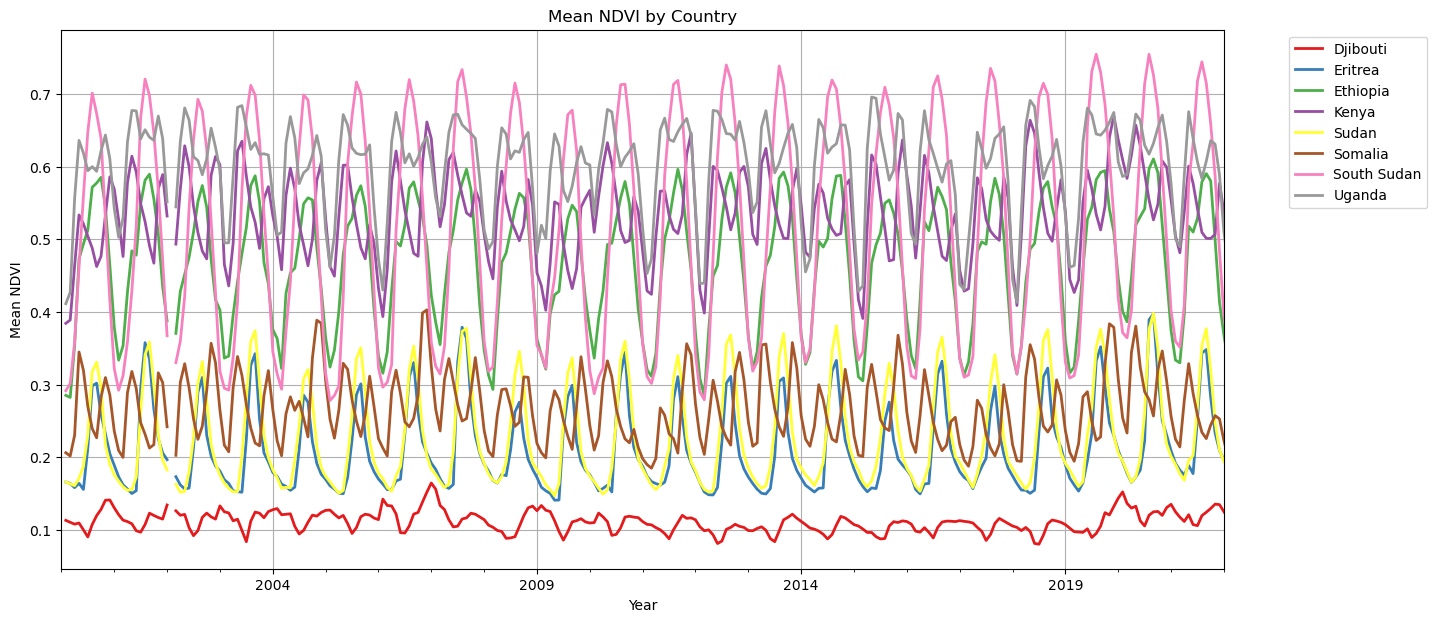

In [35]:
df_clean.groupby(['date', 'dis0_code'])['mean_ndvi'].mean().unstack().plot(figsize=(15,7), colormap='Set1', lw=2, xlim=("2000-01-01", "2022-01-01"))
plt.title('Mean NDVI by Country')
plt.xlabel('Year')
plt.ylabel('Mean NDVI')
plt.grid()
plt.legend(labels = legend_label, bbox_to_anchor=(1.05, 1.0), loc='upper left')

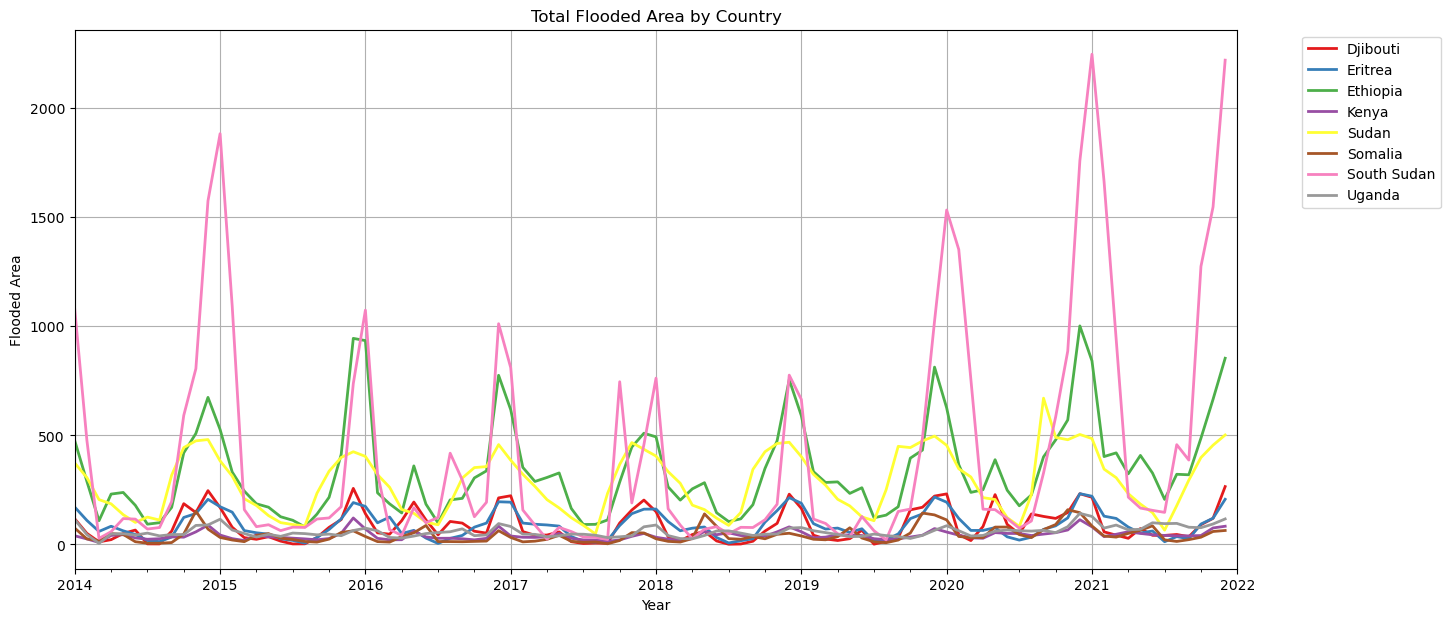

In [36]:
df_clean.groupby(['date', 'dis0_code'])['flood_sum'].mean().unstack().plot(figsize=(15,7), colormap='Set1', lw=2, xlim=("2014-01-01", "2022-01-01"))
plt.title('Total Flooded Area by Country')
plt.xlabel('Year')
plt.ylabel('Flooded Area')
plt.grid()
plt.legend(labels = legend_label, bbox_to_anchor=(1.05, 1.0), loc='upper left')

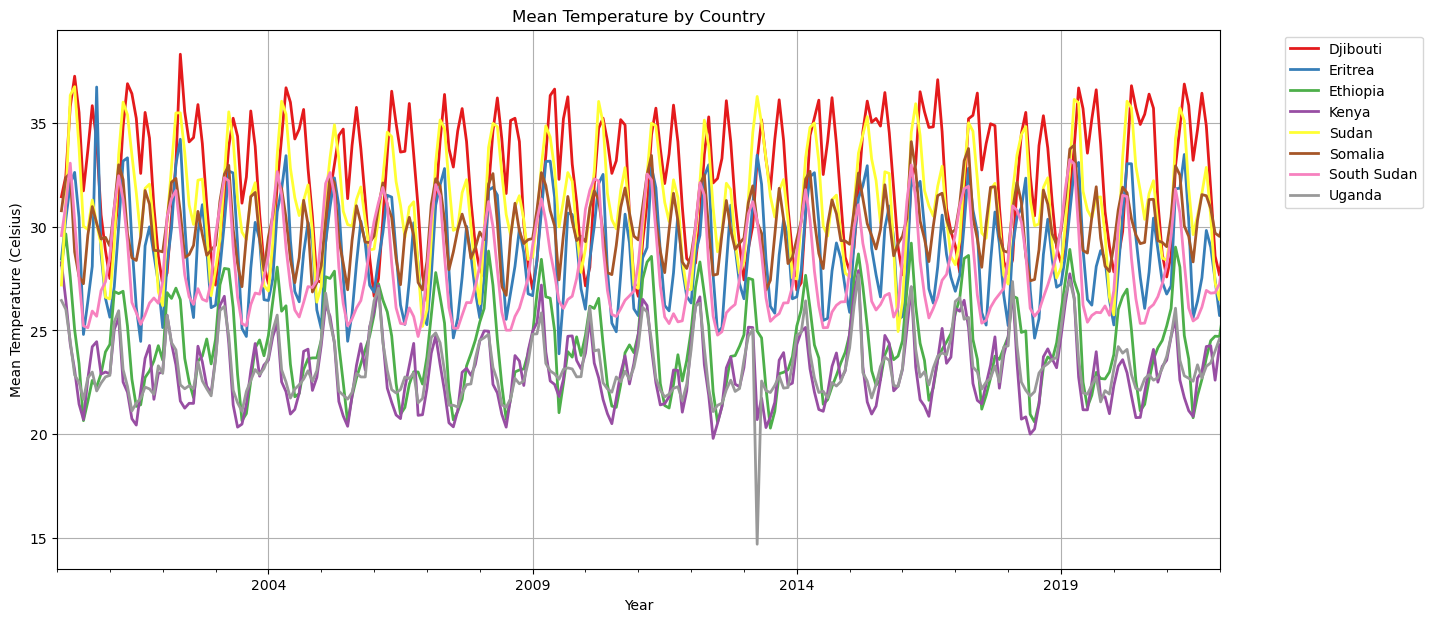

In [37]:
df_clean.groupby(['date', 'dis0_code'])['lst_celsius'].mean().unstack().plot(figsize=(15,7), colormap='Set1', lw=2, xlim=("2000-01-01", "2022-01-01"))
plt.title('Mean Temperature by Country')
plt.xlabel('Year')
plt.ylabel('Mean Temperature (Celsius)')
plt.grid()
plt.legend(labels = legend_label, bbox_to_anchor=(1.05, 1.0), loc='upper left')

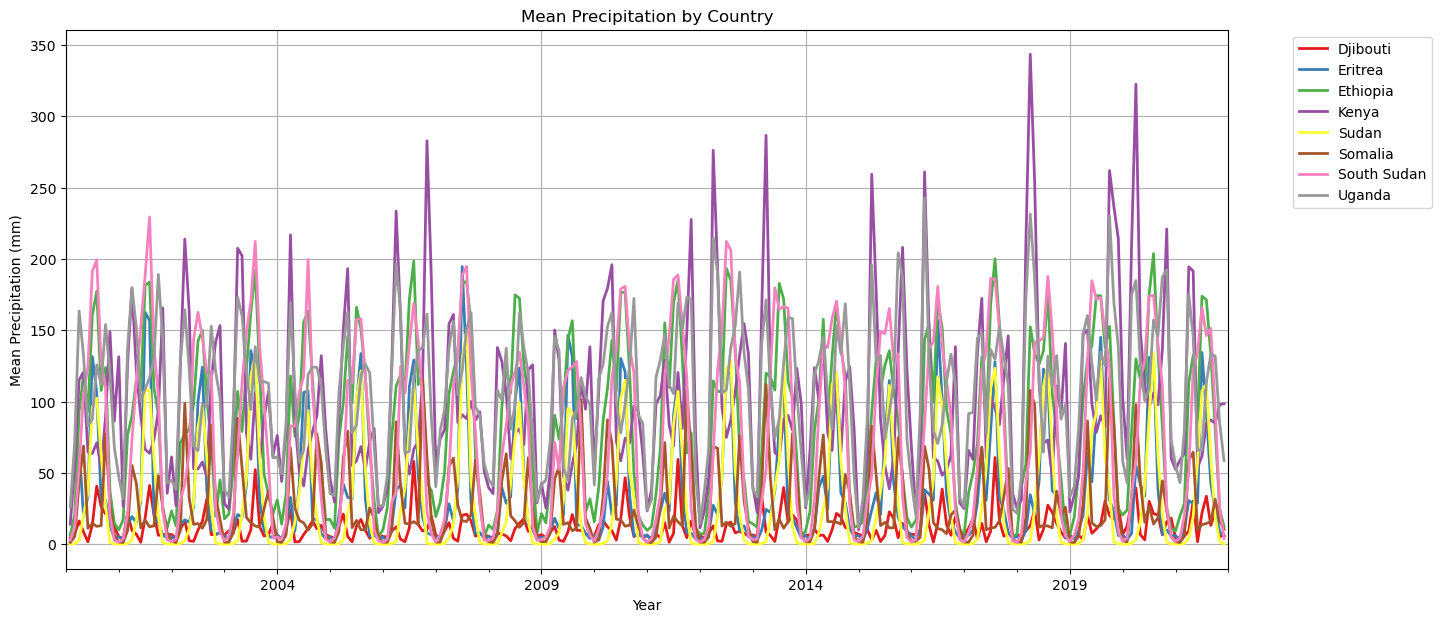

In [38]:
df_clean.groupby(['date', 'dis0_code'])['prec_mean'].mean().unstack().plot(figsize=(15,7), colormap='Set1', lw=2, xlim=("2000-01-01", "2022-01-01"))
plt.title('Mean Precipitation by Country')
plt.xlabel('Year')
plt.ylabel('Mean Precipitation (mm)')
plt.grid()
plt.legend(labels = legend_label, bbox_to_anchor=(1.05, 1.0), loc='upper left')